In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Resources.2/final_temperature_change.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
0,AFG,1970,0.898
1,AFG,1971,0.652
2,AFG,1972,-1.089
3,AFG,1973,0.262
4,AFG,1974,-0.470


In [3]:
usa_temp_anom_df= temp_anom_df[(temp_anom_df['country_code_alpha_three'] == 'USA')]
usa_temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
10863,USA,1970,-0.029
10864,USA,1971,-0.415
10865,USA,1972,-0.251
10866,USA,1973,-0.015
10867,USA,1974,0.079


In [4]:
usa_temp_anom_df= usa_temp_anom_df.drop(['country_code_alpha_three'], axis=1)
usa_temp_anom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 10863 to 10913
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 51 non-null     int64  
 1   temp_change_celsius  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [5]:
usa_temp_anom_df = usa_temp_anom_df.dropna( )

In [6]:
usa_temp_anom_df.head()

,year,temp_change_celsius
10863,1970,-0.029
10864,1971,-0.415
10865,1972,-0.251
10866,1973,-0.015
10867,1974,0.079


In [7]:
usa_temp_anom_df.set_index('year',inplace = True)
usa_temp_anom_df.head()

,temp_change_celsius
year,
1970,-0.029
1971,-0.415
1972,-0.251
1973,-0.015
1974,0.079


AxesSubplot(0.125,0.125;0.775x0.755)


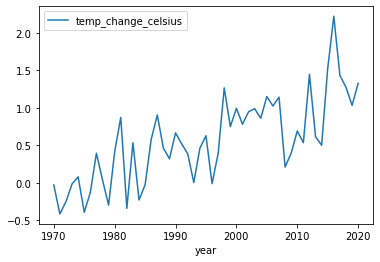

In [8]:
axis = usa_temp_anom_df.plot.line(y='temp_change_celsius',rot=0)
print(axis)
plt.show()

In [9]:
usa_temp_anom_df= usa_temp_anom_df.sort_values('temp_change_celsius',ascending=False)
usa_temp_anom_df.head(10)

,temp_change_celsius
year,
2016,2.219
2015,1.525
2012,1.445
2017,1.430
2020,1.325
2018,1.273
1998,1.264
2005,1.149
2007,1.141


In [10]:
usa_temp_anom_df.describe()

,temp_change_celsius
count,51.000000
mean,0.560569
std,0.575186
min,-0.415000
25%,0.059000
50%,0.533000
75%,0.966500
max,2.219000


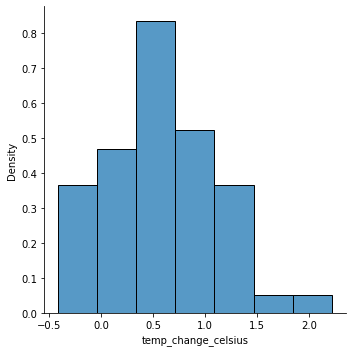

In [20]:
import seaborn as sb

# Extract feature we're interested in
data = usa_temp_anom_df['temp_change_celsius']

# Generate histogram/distribution plot
sb.displot(data, stat="density")

plt.show()

In [23]:
data.head()

year
2016    2.219
2015    1.525
2012    1.445
2017    1.430
2020    1.325
Name: temp_change_celsius, dtype: float64

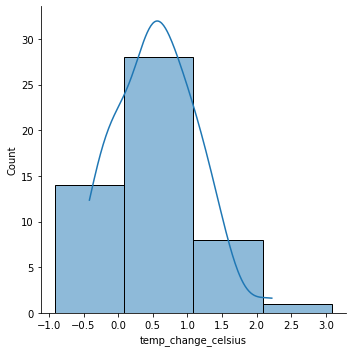

In [24]:
sb.displot(data, discrete = True, kde = True)
plt.show()

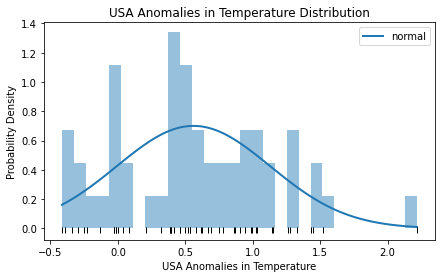

In [25]:
# Histogram
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('USA Anomalies in Temperature Distribution')
ax.set_xlabel('USA Anomalies in Temperature')
ax.set_ylabel('Probability Density')
ax.legend();

In [30]:
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: -0.09281891714630319
Skewness: 0.328021043600882


In [27]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.9759441614151001, pvalue=0.3833142817020416)

In [29]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1.1612035089512065, p-value = 0.5595615465690722
